In [199]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from sklearn import preprocessing
import math as m
from __future__ import division
%matplotlib inline

In [204]:
df = pd.read_csv('/home/aleespa/Hello-Machine-Learning/Machine Learning/train_examen.csv')
df['i' ] = 1
var = ['i','duration', 'credit_amount','installment_commitment','residence_since','age','existing_credits',
      'num_dependents']
le  = preprocessing.LabelEncoder()
df['class'] = df[['class']].apply(le.fit_transform)
X = df[var]
y = df['class']

In [224]:
n = len(var)
d = len(X)
beta = np.array([0 for i in range(n)])
b =pd.DataFrame(beta).T
norm = 1
while norm>1e-10:
    p = np.array([1/(1+m.exp(-np.matmul(X.loc[i],beta))) for i in range(d)])
    Z = np.array([m.log(p[i]/(1-p[i]))+(y.loc[i]-p[i])/(p[i]*(1-p[i])) for i in range(d)])
    W = np.diag(np.array([p[i]*(1-p[i]) for i in range(d)]))
    beta2 = np.matmul(inv(np.matmul(np.matmul(np.transpose(X),W),X)),np.matmul(np.matmul(np.transpose(X),W),Z))
    norm, beta = np.dot(beta2-beta,beta2-beta),beta2
    b= pd.concat([b,pd.DataFrame(beta).T])

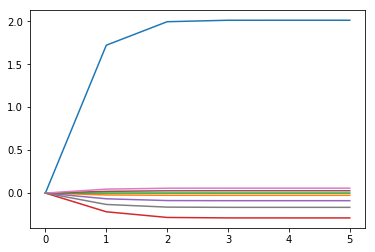

In [225]:
for i in range(n):
    pd.DataFrame(b[i]).reset_index()[i].plot()

In [227]:
beta

array([ 2.01114019e+00, -2.60741288e-02, -1.00069520e-04, -2.89268731e-01,
       -8.87340122e-02,  2.69509451e-02,  5.68593562e-02, -1.66284126e-01])